In [42]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [43]:
img_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../Dataset/train_data',
    shuffle = True,
    image_size = (256, 256),
    batch_size = 32)
class_names = img_dataset.class_names
print(class_names)

Found 6000 files belonging to 2 classes.
['Tomato___Bacterial_spot', 'Tomato___Yellow_Leaf_Curl_Virus']


In [44]:
data_directory = '../Dataset/train_data'

# Define image data generator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Percentage of data to use for validation
)

# Load and split the dataset into training and testing sets
train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='training',
    seed=42
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='validation',
    seed=42
)

Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [45]:
# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
hist = model.fit(train_generator, epochs=15, validation_data=validation_generator, steps_per_epoch=50)

Epoch 1/15
50/50 [==============================] - 50s 985ms/step - loss: 1.0512 - accuracy: 0.8219 - val_loss: 0.2757 - val_accuracy: 0.9067
Epoch 2/15
50/50 [==============================] - 49s 977ms/step - loss: 0.1911 - accuracy: 0.9194 - val_loss: 0.2492 - val_accuracy: 0.9417
Epoch 3/15
50/50 [==============================] - 50s 1s/step - loss: 0.1613 - accuracy: 0.9431 - val_loss: 0.1655 - val_accuracy: 0.9533
Epoch 4/15
50/50 [==============================] - 48s 959ms/step - loss: 0.1243 - accuracy: 0.9506 - val_loss: 0.1870 - val_accuracy: 0.9292
Epoch 5/15
50/50 [==============================] - 48s 956ms/step - loss: 0.0945 - accuracy: 0.9644 - val_loss: 0.1675 - val_accuracy: 0.9542
Epoch 6/15
50/50 [==============================] - 48s 956ms/step - loss: 0.1339 - accuracy: 0.9550 - val_loss: 0.1906 - val_accuracy: 0.9367
Epoch 7/15
50/50 [==============================] - 48s 959ms/step - loss: 0.0674 - accuracy: 0.9812 - val_loss: 0.1202 - val_accuracy: 0.9592
Ep

In [47]:
model.save('v1.keras')
#model = load_model('classifier.keras')

In [48]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Validation accuracy:', test_acc)

38/38 [==============================] - 6s 148ms/step - loss: 0.0642 - accuracy: 0.9767
Validation accuracy: 0.9766666889190674


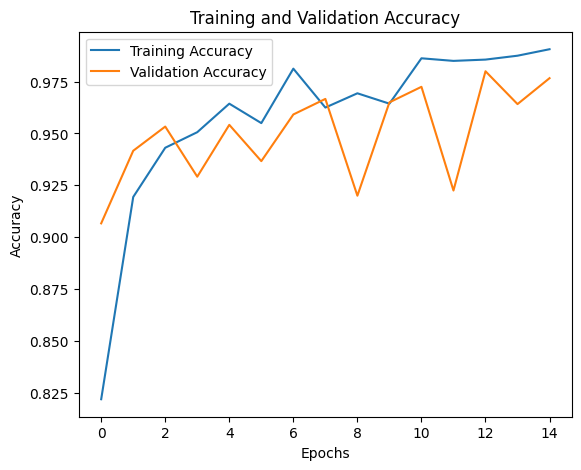

In [49]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy ')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

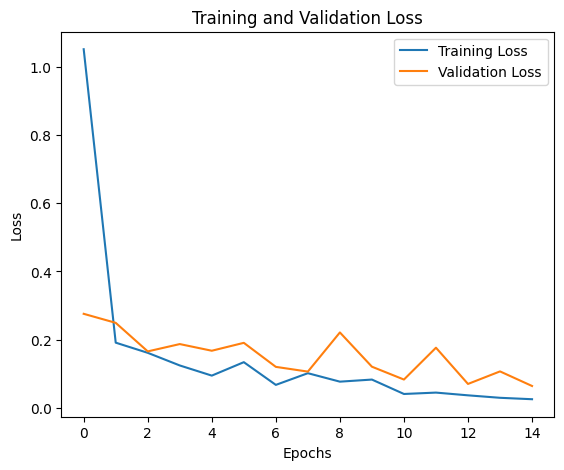

In [50]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss ')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()